# Entrenamiento de Red Neuronal Convolucional con Técnicas de Regularización y Optimización

## **Introducción**

En este proyecto desarrollaremos una **Red Neuronal Convolucional (CNN)** utilizando el dataset **CIFAR-10**, aplicando técnicas avanzadas de regularización y optimización para crear un modelo robusto y eficiente.

### Objetivos del Proyecto:
- **Regularización**: Implementar técnicas para prevenir el sobreajuste (overfitting) y mejorar la generalización
- **Optimización**: Utilizar estrategias avanzadas para hacer más eficiente el proceso de entrenamiento
- **Evaluación**: Analizar el rendimiento del modelo de forma visual y cuantitativa

### Dataset CIFAR-10:
El dataset CIFAR-10 contiene 60,000 imágenes a color de 32x32 píxeles distribuidas en 10 clases: aviones, automóviles, pájaros, gatos, ciervos, perros, ranas, caballos, barcos y camiones. Se divide en 50,000 imágenes de entrenamiento y 10,000 de prueba.

### Librerías Requeridas:
- **TensorFlow/Keras**: Framework principal para construcción y entrenamiento de redes neuronales
- **NumPy**: Operaciones matemáticas eficientes con arrays
- **Matplotlib**: Visualización de resultados y métricas
- **Seaborn**: Mejores gráficos estadísticos

## **Configuración del Entorno y Carga de Datos**

En esta fase inicial, preparamos el entorno de trabajo para nuestro proyecto de clasificación de imágenes. Este es un paso fundamental que sienta las bases para todo el proceso.

**1. Importación de Librerías:**

  * **TensorFlow y Keras:** Son el corazón de nuestra implementación. Utilizamos Keras, la API de alto nivel de TensorFlow, para construir y entrenar nuestro modelo de red neuronal de forma modular e intuitiva.
  * **Data Augmentation:** Importamos `ImageDataGenerator` para aplicar transformaciones a las imágenes de entrenamiento, una técnica clave para mejorar la generalización del modelo.
  * **Librerías de Soporte:** `NumPy` es esencial para el manejo eficiente de los arreglos numéricos (las imágenes y etiquetas), mientras que `Matplotlib` y `Seaborn` nos permitirán crear visualizaciones de alta calidad para analizar nuestros datos y resultados.

**2. Reproducibilidad:**

  * Fijamos las "semillas" (`seed`) aleatorias para TensorFlow y NumPy. Esto garantiza que cualquier persona que ejecute este código obtenga exactamente los mismos resultados, lo cual es crucial para la experimentación y depuración.

**3. Carga del Dataset CIFAR-10:**

  * Cargamos el dataset CIFAR-10, un estándar en la investigación de visión por computadora. Contiene 50,000 imágenes de entrenamiento y 10,000 de prueba, de 32x32 píxeles a color, distribuidas equitativamente en 10 categorías (aviones, autos, pájaros, etc.).
  * Definimos una lista con los nombres de las clases para que nuestras visualizaciones y reportes sean más interpretables.

Finalmente, imprimimos un resumen inicial del dataset para verificar que las dimensiones y el rango de valores de los píxeles son los esperados.

In [8]:
%%time
# Importar las librerías principales de TensorFlow y Keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar10  # Dataset CIFAR-10
from tensorflow.keras.models import Sequential  # Modelo secuencial
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization  # Capas de la red
from tensorflow.keras.utils import to_categorical  # Para codificación one-hot
from tensorflow.keras import regularizers  # Regularizadores L1/L2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint  # Callbacks de optimización
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Para data augmentation

# Importar librerías para visualización y manejo de datos
import numpy as np  # Operaciones numéricas
import matplotlib.pyplot as plt  # Gráficos básicos
import seaborn as sns  # Gráficos estadísticos mejorados

# Configurar el estilo de los gráficos para mejor presentación
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configurar semilla para reproducibilidad de resultados
tf.random.set_seed(42)
np.random.seed(42)

# Cargar el dataset CIFAR-10
# Los datos ya vienen pre-divididos en conjuntos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Definir los nombres de las clases para interpretación posterior
class_names = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

# Verificar las dimensiones de los datos cargados
print("="*60)
print("📊 INFORMACIÓN DEL DATASET CIFAR-10")
print("="*60)
print(f"Dimensiones de imágenes de entrenamiento: {x_train.shape}")
print(f"Dimensiones de etiquetas de entrenamiento: {y_train.shape}")
print(f"Dimensiones de imágenes de prueba: {x_test.shape}")
print(f"Dimensiones de etiquetas de prueba: {y_test.shape}")
print(f"Número total de clases: {len(class_names)}")
print(f"Rango de valores de píxeles: {x_train.min()} - {x_train.max()}")

📊 INFORMACIÓN DEL DATASET CIFAR-10
Dimensiones de imágenes de entrenamiento: (50000, 32, 32, 3)
Dimensiones de etiquetas de entrenamiento: (50000, 1)
Dimensiones de imágenes de prueba: (10000, 32, 32, 3)
Dimensiones de etiquetas de prueba: (10000, 1)
Número total de clases: 10
Rango de valores de píxeles: 0 - 255
CPU times: user 8.45 s, sys: 1.66 s, total: 10.1 s
Wall time: 10.6 s


## **Normalización y Creación de Conjuntos de Datos**

Antes de que nuestro modelo pueda aprender de los datos, es imperativo realizar un preprocesamiento adecuado. Este paso refina los datos crudos para hacer el entrenamiento más estable, rápido y efectivo.

**1. Normalización de Píxeles:**

  * Los valores de los píxeles de las imágenes (0-255) se escalan a un rango de [0, 1] dividiéndolos por 255.0. Esta normalización es crucial porque asegura que todas las características (píxeles) tengan una escala similar, lo que previene que el gradiente explote y ayuda al optimizador a encontrar el mínimo de la función de pérdida de manera más eficiente.

**2. Codificación One-Hot:**

  * Las etiquetas de clase (e.g., 0 para 'Avión', 1 para 'Automóvil') se convierten en vectores. Para 10 clases, la etiqueta `1` se transforma en `[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]`. Este formato es un requisito para la función de pérdida `categorical_crossentropy`, que mide la discrepancia entre la distribución de probabilidad predicha por el modelo y esta distribución verdadera.

**3. Creación del Conjunto de Validación:**

  * Dividimos el conjunto de entrenamiento original, destinando un 20% de los datos para un **conjunto de validación**. Este conjunto es fundamental: no se usa para entrenar el modelo, sino para evaluar su rendimiento en datos "no vistos" después de cada época. Monitorear las métricas en este conjunto nos permite detectar el **sobreajuste** (overfitting) y tomar decisiones informadas, como detener el entrenamiento temprano.

**4. Conversión de Tipos:**

  * Convertiremos los datos a float32 para optimizar el uso de memoria y acelerar los cálculos en GPU.


Finalmente, visualizamos una muestra de las imágenes ya procesadas junto con sus etiquetas para confirmar que los datos se han cargado y preparado correctamente.

🔄 DATOS DESPUÉS DEL PREPROCESAMIENTO
Conjunto de entrenamiento - Imágenes: (40000, 32, 32, 3), Etiquetas: (40000, 10)
Conjunto de validación - Imágenes: (10000, 32, 32, 3), Etiquetas: (10000, 10)
Conjunto de prueba - Imágenes: (10000, 32, 32, 3), Etiquetas: (10000, 10)
Rango de valores después de normalización: 0.000 - 1.000


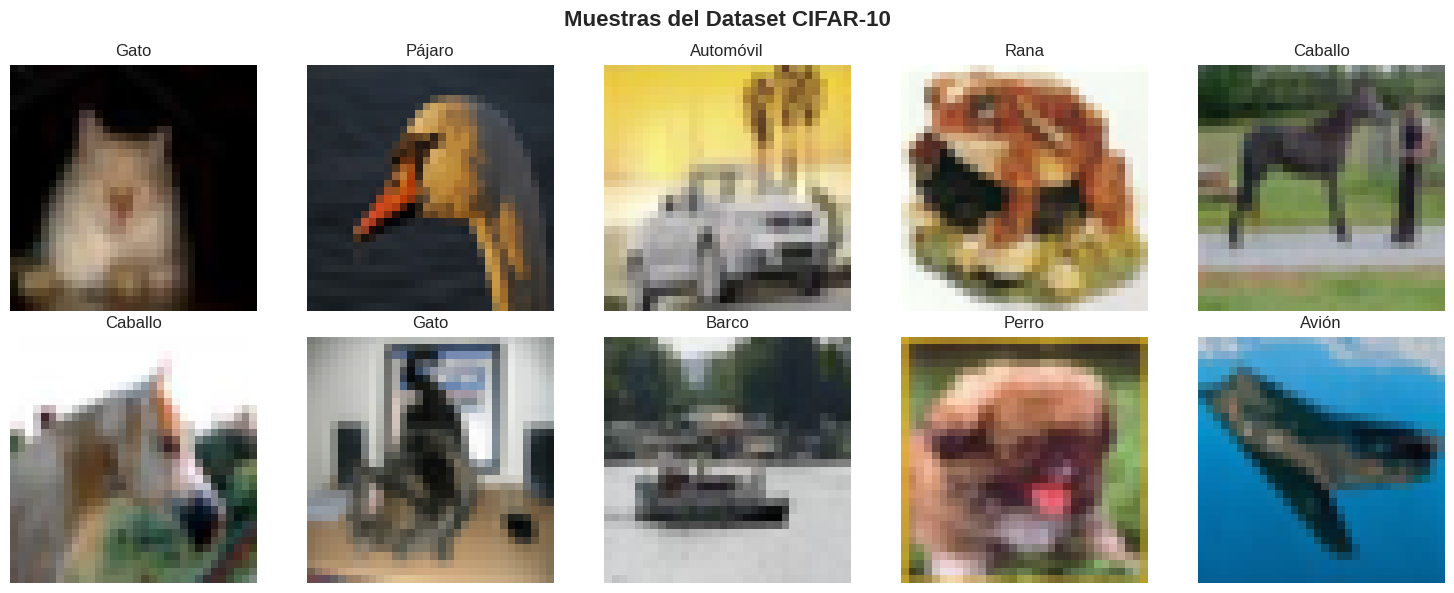

CPU times: user 1.54 s, sys: 316 ms, total: 1.86 s
Wall time: 1.93 s


In [9]:
%%time
# Convertir los datos a tipo float32 para optimizar memoria y cálculos
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizar los valores de píxeles al rango [0, 1]
# Esto mejora significativamente la convergencia del modelo
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convertir etiquetas a formato one-hot encoding
# Necesario para usar la función de pérdida categorical_crossentropy
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Crear conjunto de validación a partir del conjunto de entrenamiento
# Usaremos 20% de los datos de entrenamiento para validación
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Verificar las nuevas dimensiones después del preprocesamiento
print("="*60)
print("🔄 DATOS DESPUÉS DEL PREPROCESAMIENTO")
print("="*60)
print(f"Conjunto de entrenamiento - Imágenes: {x_train.shape}, Etiquetas: {y_train.shape}")
print(f"Conjunto de validación - Imágenes: {x_val.shape}, Etiquetas: {y_val.shape}")
print(f"Conjunto de prueba - Imágenes: {x_test.shape}, Etiquetas: {y_test.shape}")
print(f"Rango de valores después de normalización: {x_train.min():.3f} - {x_train.max():.3f}")

# Visualizar algunas imágenes de muestra del dataset
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Muestras del Dataset CIFAR-10', fontsize=16, fontweight='bold')

for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(x_train[i])
    # Convertir one-hot back to class index para obtener el nombre
    class_idx = np.argmax(y_train[i])
    axes[row, col].set_title(f'{class_names[class_idx]}', fontsize=12)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


## **Diseño de la Arquitectura de la Red Neuronal Convolucional (CNN)**

Aquí definimos la arquitectura de nuestro modelo, el "cerebro" que aprenderá a clasificar las imágenes. Hemos diseñado una CNN más profunda y robusta, incorporando varias técnicas clave para mejorar el rendimiento y la estabilidad.

La arquitectura se divide en dos partes principales:

**1. Base Convolucional (Extracción de Características):**

  * **Tres Bloques Convolucionales:** El modelo utiliza tres bloques `Conv2D` apilados. La profundidad (número de filtros) aumenta progresivamente (32 → 64 → 128). Esto permite al modelo aprender jerarquías de características: las primeras capas detectan patrones simples (bordes, colores) y las capas más profundas combinan estos patrones para reconocer características complejas (ojos, ruedas, alas).

  * **Batch Normalization:** Después de cada capa `Conv2D`, se añade una capa de `BatchNormalization`. Esta técnica normaliza las salidas de la capa anterior, lo que estabiliza el proceso de aprendizaje, lo acelera significativamente y tiene un ligero efecto regularizador.
  * **MaxPooling:** Cada bloque termina con una capa `MaxPooling2D`, que reduce la dimensionalidad espacial (el alto y ancho) de los mapas de características. Esto hace que el modelo sea más eficiente y le otorga invarianza a pequeñas traslaciones en la imagen.
  
**2. Clasificador (Capas Densas):**

  * **Flatten:** Esta capa aplana el mapa de características 3D final en un vector 1D para poder conectarlo a las capas densas.
  * **Capa Densa y Dropout:** Una capa densa con 256 neuronas actúa como un clasificador sobre las características extraídas. Inmediatamente después, aplicamos `Dropout` con una tasa del 50%, una potente técnica de regularización que "apaga" aleatoriamente la mitad de las neuronas durante el entrenamiento. Esto fuerza a la red a aprender representaciones más robustas y evita la co-dependencia entre neuronas.
  * **Capa de Salida:** La capa final tiene 10 neuronas (una por clase) y utiliza la función de activación `softmax`, que convierte las salidas en una distribución de probabilidad, indicando la confianza del modelo para cada clase.

### Arquitectura Principal:
  1. **Bloque Convolucional 1**: Conv2D (32 filtros) + BatchNorm + MaxPooling
  2. **Bloque Convolucional 2**: Conv2D (64 filtros) + BatchNorm + MaxPooling  
  3. **Bloque Convolucional 3**: Conv2D (128 filtros) + BatchNorm + MaxPooling
  4. **Clasificador**: Flatten + Dense (256) + Dropout + Dense (10)

**Regularización L2 (Weight Decay):** Todas las capas convolucionales y la primera capa densa incluyen `kernel_regularizer=l2(0.001)`. Esto añade una penalización a la función de pérdida basada en el tamaño de los pesos, incentivando al modelo a mantenerlos pequeños y simples para prevenir el sobreajuste.

In [10]:
%%time
# Función para crear el modelo CNN con arquitectura mejorada
def create_cnn_model():
    """
    Crea y retorna un modelo CNN con técnicas avanzadas de regularización
    """
    model = Sequential([
        # =================== BLOQUE CONVOLUCIONAL 1 ===================
        # Primera capa convolucional: 32 filtros de 3x3 con regularización L2
        Conv2D(32, (3, 3),
               activation='relu',
               padding='same',
               kernel_regularizer=regularizers.l2(0.001),  # Regularización L2
               input_shape=(32, 32, 3),  # Dimensiones de entrada
               name='conv1'),

        # Batch Normalization para normalizar activaciones y acelerar entrenamiento
        BatchNormalization(name='bn1'),

        # Max Pooling para reducir dimensionalidad espacial
        MaxPooling2D((2, 2), name='pool1'),

        # =================== BLOQUE CONVOLUCIONAL 2 ===================
        # Segunda capa convolucional: 64 filtros para características más complejas
        Conv2D(64, (3, 3),
               activation='relu',
               padding='same',
               kernel_regularizer=regularizers.l2(0.001),
               name='conv2'),

        BatchNormalization(name='bn2'),
        MaxPooling2D((2, 2), name='pool2'),

        # =================== BLOQUE CONVOLUCIONAL 3 ===================
        # Tercera capa convolucional: 128 filtros para patrones más sofisticados
        Conv2D(128, (3, 3),
               activation='relu',
               padding='same',
               kernel_regularizer=regularizers.l2(0.001),
               name='conv3'),

        BatchNormalization(name='bn3'),
        MaxPooling2D((2, 2), name='pool3'),

        # =================== CLASIFICADOR ===================
        # Aplanar el tensor 3D a vector 1D para las capas densas
        Flatten(name='flatten'),

        # Capa densa con 256 neuronas y regularización L2
        Dense(256,
              activation='relu',
              kernel_regularizer=regularizers.l2(0.001),
              name='dense1'),

        # Dropout para prevenir overfitting (50% de neuronas desactivadas)
        Dropout(0.5, name='dropout1'),

        # Capa de salida: 10 neuronas (una por clase) con activación softmax
        Dense(10,
              activation='softmax',
              name='output')
    ])

    return model

# Crear el modelo
model = create_cnn_model()

# Mostrar resumen detallado de la arquitectura
print("="*80)
print("🏗️  ARQUITECTURA DEL MODELO CNN")
print("="*80)
model.summary()

# Calcular y mostrar el número total de parámetros
total_params = model.count_params()
trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
non_trainable_params = sum([tf.keras.backend.count_params(w) for w in model.non_trainable_weights])

print(f"\n📊 INFORMACIÓN DE PARÁMETROS:")
print(f"Parámetros totales: {total_params:,}")
print(f"Parámetros entrenables: {trainable_params:,}")
print(f"Parámetros no entrenables: {non_trainable_params:,}")

🏗️  ARQUITECTURA DEL MODELO CNN


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 32, 32, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 16, 16, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 8, 8, 128)      │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 621,258 (2.37 MB)

 Trainable params: 620,810 (2.37 MB)

 Non-trainable params: 448 (1.75 KB)


📊 INFORMACIÓN DE PARÁMETROS:
Parámetros totales: 621,258
Parámetros entrenables: 620,810
Parámetros no entrenables: 448
CPU times: user 145 ms, sys: 1.87 ms, total: 147 ms
Wall time: 148 ms



## **Configuración de Data Augmentation y Compilación del Modelo**

En esta sección, preparamos las herramientas y estrategias que guiarán y optimizarán el proceso de entrenamiento.

**1. Data Augmentation:**

  * Configuramos un generador de imágenes (`ImageDataGenerator`) que aplicará transformaciones aleatorias (rotaciones, desplazamientos, zoom, volteos) a las imágenes de entrenamiento en tiempo real. Esto crea un flujo casi infinito de nuevas variantes de las imágenes existentes, lo que obliga al modelo a aprender las características esenciales de los objetos en lugar de memorizar su orientación o posición exacta. Es una de las técnicas más efectivas para combatir el sobreajuste y mejorar la robustez del modelo.
  Implementaremos transformaciones aleatorias de:

- **Rotación**: ±15 grados para invarianza rotacional
- **Traslación**: ±10% horizontal y vertical
- **Zoom**: ±10% para invarianza de escala
- **Volteo horizontal**: Para simetría (no vertical, ya que los objetos tienen orientación específica)

**2. Optimizador Adam:**

  * Elegimos el optimizador **Adam**, una opción robusta y ampliamente utilizada que adapta la tasa de aprendizaje para cada parámetro del modelo. Configuramos sus hiperparámetros (`learning_rate`, `beta_1`, `beta_2`) para un control preciso sobre el proceso de optimización.

**3. Callbacks de Optimización:**

  * Los callbacks son herramientas que monitorean el entrenamiento y ejecutan acciones predefinidas. Hemos configurado tres callbacks esenciales:
      * **`EarlyStopping`**: Vigila la pérdida de validación (`val_loss`). Si no mejora durante 15 épocas (`patience=15`), detiene el entrenamiento. Esto evita el sobreajuste y ahorra tiempo computacional. `restore_best_weights=True` asegura que el modelo final tenga los pesos de la época con el mejor rendimiento.
      * **`ReduceLROnPlateau`**: Si la `val_loss` se estanca durante 7 épocas (`patience=7`), reduce la tasa de aprendizaje. Esto permite al modelo realizar ajustes más finos cuando se acerca a un mínimo óptimo. Reduce el learning rate cuando el entrenamiento se estanca.
    - `factor=0.2`: Reduce LR a 1/5 del valor actual
    - `patience=7`: Espera 7 épocas antes de reducir
    - `min_lr=1e-7`: Límite inferior del learning rate
      * **`ModelCheckpoint`**: Guarda automáticamente el modelo completo en un archivo (`best_model.h5`) cada vez que la `val_loss` alcanza un nuevo mínimo. Esto nos garantiza tener siempre la mejor versión del modelo, independientemente de si el entrenamiento se detiene antes de tiempo.

**4. Compilación:**

  * Finalmente, `compilamos` el modelo, uniendo la arquitectura, el optimizador, la función de pérdida (`categorical_crossentropy`) y las métricas que queremos monitorear (`accuracy` y `top_k_categorical_accuracy`). Esta última métrica considera una predicción como correcta si la clase verdadera está entre las 5 más probables, lo cual es útil para evaluar la confianza general del modelo.

⚙️  CONFIGURACIÓN DEL ENTRENAMIENTO
Optimizador: Adam (lr=0.001000)
Función de pérdida: Categorical Crossentropy
Métricas: Accuracy, Top-K Accuracy
Data Augmentation: Activo
Callbacks configurados: 3

🖼️  EJEMPLO DE DATA AUGMENTATION
Transformación 1 (after clip) - Tipo de dato: float32, Min: 0.000, Max: 0.849
Transformación 2 (after clip) - Tipo de dato: float32, Min: 0.000, Max: 0.844
Transformación 3 (after clip) - Tipo de dato: float32, Min: 0.000, Max: 0.848
Transformación 4 (after clip) - Tipo de dato: float32, Min: 0.000, Max: 0.849
Transformación 5 (after clip) - Tipo de dato: float32, Min: 0.000, Max: 0.852
Transformación 6 (after clip) - Tipo de dato: float32, Min: 0.000, Max: 0.839
Transformación 7 (after clip) - Tipo de dato: float32, Min: 0.000, Max: 0.851
Transformación 8 (after clip) - Tipo de dato: float32, Min: 0.000, Max: 0.842
Transformación 9 (after clip) - Tipo de dato: float32, Min: 0.000, Max: 0.852


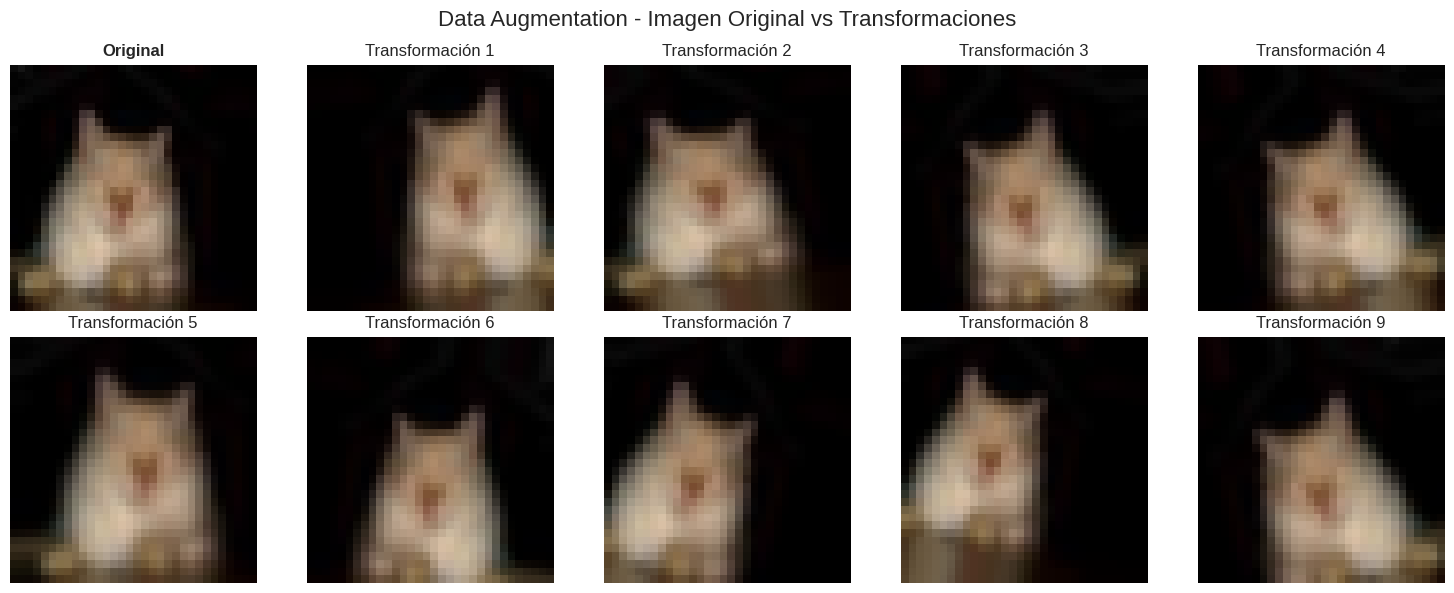

CPU times: user 648 ms, sys: 85.9 ms, total: 734 ms
Wall time: 733 ms


In [11]:
%%time
# Configurar Data Augmentation para aumentar artificialmente el dataset
datagen = ImageDataGenerator(
    rotation_range=15,           # Rotación aleatoria ±15 grados
    width_shift_range=0.1,       # Traslación horizontal ±10%
    height_shift_range=0.1,      # Traslación vertical ±10%
    zoom_range=0.1,              # Zoom aleatorio ±10%
    horizontal_flip=True,        # Volteo horizontal aleatorio
    # brightness_range=[0.8, 1.2], # Variación de brillo 80%-120% - Eliminado temporalmente
    fill_mode='nearest'          # Relleno de píxeles para transformaciones
)

# Ajustar el generador a los datos de entrenamiento
datagen.fit(x_train)

# Configurar el optimizador Adam con learning rate personalizado
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,    # Tasa de aprendizaje inicial
    beta_1=0.9,            # Momentum para el primer momento
    beta_2=0.999,          # Momentum para el segundo momento
    epsilon=1e-07          # Constante pequeña para estabilidad numérica
)

# Definir callbacks para optimización del entrenamiento
callbacks = [
    # Early Stopping: Detiene el entrenamiento cuando no hay mejora
    EarlyStopping(
        monitor='val_loss',           # Métrica a monitorear
        patience=15,                  # Épocas a esperar sin mejora
        restore_best_weights=True,    # Restablecer mejores pesos
        verbose=1,                    # Mostrar mensaje cuando se active
        mode='min'                    # Buscar el mínimo de val_loss
    ),

    # Reduce Learning Rate: Reduce LR cuando se estanca el entrenamiento
    ReduceLROnPlateau(
        monitor='val_loss',           # Métrica a monitorear
        factor=0.2,                   # Factor de reducción (LR = LR * factor)
        patience=7,                   # Épocas a esperar antes de reducir
        min_lr=1e-7,                 # Learning rate mínimo
        verbose=1,                    # Mostrar mensaje cuando se active
        mode='min'                    # Buscar el mínimo
    ),

    # Model Checkpoint: Guarda el mejor modelo automáticamente
    ModelCheckpoint(
        filepath='best_model.h5',     # Ruta donde guardar el modelo
        monitor='val_loss',           # Métrica para determinar "mejor"
        save_best_only=True,          # Solo guardar si mejora
        save_weights_only=False,      # Guardar modelo completo
        verbose=1,                    # Mostrar mensaje cuando guarde
        mode='min'                    # Buscar el mínimo
    )
]

# Compilar el modelo con optimizador, función de pérdida y métricas
model.compile(
    optimizer=optimizer,                    # Optimizador Adam configurado
    loss='categorical_crossentropy',        # Función de pérdida para clasificación multiclase
    metrics=['accuracy', 'top_k_categorical_accuracy']  # Métricas a evaluar
)

print("="*60)
print("⚙️  CONFIGURACIÓN DEL ENTRENAMIENTO")
print("="*60)
print(f"Optimizador: Adam (lr={optimizer.learning_rate.numpy():.6f})")
print(f"Función de pérdida: Categorical Crossentropy")
print(f"Métricas: Accuracy, Top-K Accuracy")
print(f"Data Augmentation: Activo")
print(f"Callbacks configurados: {len(callbacks)}")

# Mostrar ejemplo de Data Augmentation
print("\n🖼️  EJEMPLO DE DATA AUGMENTATION")
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Data Augmentation - Imagen Original vs Transformaciones', fontsize=16)

# Tomar una imagen de ejemplo
sample_image = x_train[0].reshape(1, 32, 32, 3)

# Mostrar imagen original
axes[0, 0].imshow(x_train[0])
axes[0, 0].set_title('Original', fontweight='bold')
axes[0, 0].axis('off')

# Generar y mostrar 9 transformaciones
gen = datagen.flow(sample_image, batch_size=1)
for i in range(9):
    augmented = next(gen)[0]
    # Clip values to the [0, 1] range (Still useful as a safeguard)
    augmented = np.clip(augmented, 0.0, 1.0)
    # Add print statements to check data type and range after clipping
    print(f"Transformación {i+1} (after clip) - Tipo de dato: {augmented.dtype}, Min: {augmented.min():.3f}, Max: {augmented.max():.3f}")
    # Convert the augmented image back to uint8 for display
    augmented_display = (augmented * 255).astype('uint8')
    row = (i + 1) // 5
    col = (i + 1) % 5
    axes[row, col].imshow(augmented_display) # Use the converted image data here
    axes[row, col].set_title(f'Transformación {i+1}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


## **Ejecución del Entrenamiento del Modelo**

Este es el núcleo del proceso de aprendizaje. Con la arquitectura definida y la configuración de entrenamiento lista, procedemos a entrenar el modelo utilizando el método `model.fit`.

**Proceso de Entrenamiento:**

  * **Generador de Datos:** En lugar de pasar el conjunto de entrenamiento `(x_train, y_train)` directamente, utilizamos `datagen.flow(...)`. Esto crea un generador que, en cada `batch`, toma imágenes del conjunto de entrenamiento y les aplica las transformaciones de *Data Augmentation* que definimos. Esto asegura que el modelo vea versiones ligeramente diferentes de las imágenes en cada época, promoviendo una mejor generalización.
  * **Épocas y Tamaño de Lote (`Batch Size`):** Se ha configurado para un máximo de 100 épocas, con un tamaño de lote de 32. Esto significa que el modelo procesará los 40,000 imágenes de entrenamiento en lotes de 32, y repetirá este ciclo hasta 100 veces. Sin embargo, gracias a `EarlyStopping`, es probable que el entrenamiento se detenga antes si el modelo deja de mejorar.
  * **Validación y Pasos:** En cada época, después de procesar todos los datos de entrenamiento, el modelo se evalúa en el conjunto de validación (`validation_data`). Los `steps_per_epoch`(Calculado automáticamente basado en el tamaño del dataset) y `validation_steps`(Para evaluar en el conjunto de validación) se calculan para asegurar que el modelo procese una cantidad equivalente a una pasada completa por los datos de entrenamiento y validación en cada época.
  * **Monitoreo Activo:** Durante la ejecución, los *callbacks* que configuramos estarán activos. Veremos mensajes en la salida que indican cuándo se guarda un mejor modelo (`ModelCheckpoint`), cuándo se reduce la tasa de aprendizaje (`ReduceLROnPlateau`) y, finalmente, si el entrenamiento se detiene prematuramente (`EarlyStopping`).

 Proceso Durante el Entrenamiento:
1. **Forward Pass**: Las imágenes pasan por la red
2. **Data Augmentation**: Se aplican transformaciones aleatorias
3. **Loss Calculation**: Se calcula la pérdida usando categorical crossentropy
4. **Backpropagation**: Se actualizan los pesos usando Adam
5. **Regularización**: L2 y Dropout actúan para prevenir overfitting
6. **Validation**: Se evalúa el modelo en datos no vistos
7. **Callbacks**: Monitorizan y optimizan el proceso

El historial completo del entrenamiento (pérdida y precisión para cada época en los conjuntos de entrenamiento y validación) se almacena en la variable `history`, que será crucial para el análisis visual en el siguiente paso.

In [12]:
%%time
# Configurar parámetros de entrenamiento
EPOCHS = 100        # Número máximo de épocas
BATCH_SIZE = 32     # Tamaño de batch para balance memoria-rendimiento

# Calcular steps per epoch para data augmentation
steps_per_epoch = len(x_train) // BATCH_SIZE
validation_steps = len(x_val) // BATCH_SIZE

print("="*60)
print("🚀 INICIANDO ENTRENAMIENTO DEL MODELO")
print("="*60)
print(f"Épocas máximas: {EPOCHS}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")
print(f"Data Augmentation: Activado")
print("="*60)

# Entrenar el modelo con data augmentation
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),  # Datos de entrenamiento con augmentation
    epochs=EPOCHS,                                          # Número máximo de épocas
    steps_per_epoch=steps_per_epoch,                       # Pasos por época
    validation_data=(x_val, y_val),                        # Datos de validación
    validation_steps=validation_steps,                     # Pasos de validación
    callbacks=callbacks,                                   # Lista de callbacks
    verbose=1,                                            # Mostrar progreso detallado
    shuffle=True                                          # Mezclar datos en cada época
)

print("\n" + "="*60)
print("✅ ENTRENAMIENTO COMPLETADO")
print("="*60)

# Obtener información sobre el entrenamiento completado
epochs_trained = len(history.history['loss'])
best_epoch = np.argmin(history.history['val_loss']) + 1
best_val_loss = min(history.history['val_loss'])
best_val_acc = max(history.history['val_accuracy'])

print(f"Épocas entrenadas: {epochs_trained}")
print(f"Mejor época: {best_epoch}")
print(f"Mejor val_loss: {best_val_loss:.4f}")
print(f"Mejor val_accuracy: {best_val_acc:.4f}")

🚀 INICIANDO ENTRENAMIENTO DEL MODELO
Épocas máximas: 100
Batch size: 32
Steps per epoch: 1250
Validation steps: 312
Data Augmentation: Activado
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.3187 - loss: 2.4977 - top_k_categorical_accuracy: 0.8196

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 1: val_loss improved from inf to 1.64455, saving model to best_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 175s 136ms/step - accuracy: 0.3188 - loss: 2.4974 - top_k_categorical_accuracy: 0.8196 - val_accuracy: 0.5122 - val_loss: 1.6445 - val_top_k_categorical_accuracy: 0.9373 - learning_rate: 0.0010
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.4679 - loss: 1.7944 - top_k_categorical_accuracy: 0.9134
Epoch 2: val_loss did not improve from 1.64455
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 195s 131ms/step - accuracy: 0.4679 - loss: 1.7944 - top_k_categorical_accuracy: 0.9134 - val_accuracy: 0.5049 - val_loss: 1.7311 - val_top_k_categorical_accuracy: 0.9203 - learning_rate: 0.0010
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.5417 - loss: 1.6048 - top_k_categorical_accuracy: 0.9376
Epoch 3: val_loss improved from 1.64455 to 1.39215, saving model to best_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 164s 131ms/step - accuracy: 0.5417 - loss: 1.6048 - top_k_categorical_accuracy: 0.9376 - val_accuracy: 0.6342 - val_loss: 1.3921 - val_top_k_categorical_accuracy: 0.9574 - learning_rate: 0.0010
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.5792 - loss: 1.5571 - top_k_categorical_accuracy: 0.9487
Epoch 4: val_loss did not improve from 1.39215
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 167s 134ms/step - accuracy: 0.5792 - loss: 1.5571 - top_k_categorical_accuracy: 0.9487 - val_accuracy: 0.6190 - val_loss: 1.4730 - val_top_k_categorical_accuracy: 0.9499 - learning_rate: 0.0010
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6153 - loss: 1.4933 - top_k_categorical_accuracy: 0.9547
Epoch 5: val_loss did not improve from 1.39215
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 199s 132ms/step - accuracy: 0.6153 - loss: 1.4933 - top_k_categorical_accuracy: 0.9547 - val_accuracy: 0.6007 - val_loss: 1.5514 - val_top_k_categorical_accuracy: 0.9484

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 165s 132ms/step - accuracy: 0.6760 - loss: 1.3211 - top_k_categorical_accuracy: 0.9683 - val_accuracy: 0.6834 - val_loss: 1.3033 - val_top_k_categorical_accuracy: 0.9624 - learning_rate: 0.0010
Epoch 11/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6785 - loss: 1.3050 - top_k_categorical_accuracy: 0.9668
Epoch 11: val_loss did not improve from 1.30327
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 131ms/step - accuracy: 0.6785 - loss: 1.3050 - top_k_categorical_accuracy: 0.9668 - val_accuracy: 0.6691 - val_loss: 1.4038 - val_top_k_categorical_accuracy: 0.9631 - learning_rate: 0.0010
Epoch 12/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.6811 - loss: 1.2864 - top_k_categorical_accuracy: 0.9699
Epoch 12: val_loss did not improve from 1.30327
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 132ms/step - accuracy: 0.6811 - loss: 1.2864 - top_k_categorical_accuracy: 0.9699 - val_accuracy: 0.6794 - val_loss: 1.3046 - val_top_k_categorical_accuracy: 0.

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 165s 132ms/step - accuracy: 0.6941 - loss: 1.2617 - top_k_categorical_accuracy: 0.9724 - val_accuracy: 0.7085 - val_loss: 1.2150 - val_top_k_categorical_accuracy: 0.9692 - learning_rate: 0.0010
Epoch 14/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6849 - loss: 1.2709 - top_k_categorical_accuracy: 0.9731
Epoch 14: val_loss did not improve from 1.21498
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 201s 131ms/step - accuracy: 0.6849 - loss: 1.2709 - top_k_categorical_accuracy: 0.9731 - val_accuracy: 0.6911 - val_loss: 1.2553 - val_top_k_categorical_accuracy: 0.9765 - learning_rate: 0.0010
Epoch 15/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6958 - loss: 1.2544 - top_k_categorical_accuracy: 0.9724
Epoch 15: val_loss did not improve from 1.21498
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 164s 131ms/step - accuracy: 0.6958 - loss: 1.2544 - top_k_categorical_accuracy: 0.9724 - val_accuracy: 0.6721 - val_loss: 1.3412 - val_top_k_categorical_accuracy: 0.

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 164s 131ms/step - accuracy: 0.7081 - loss: 1.2070 - top_k_categorical_accuracy: 0.9769 - val_accuracy: 0.7438 - val_loss: 1.1036 - val_top_k_categorical_accuracy: 0.9799 - learning_rate: 0.0010
Epoch 21/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7126 - loss: 1.2018 - top_k_categorical_accuracy: 0.9748
Epoch 21: val_loss did not improve from 1.10357
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 163s 130ms/step - accuracy: 0.7126 - loss: 1.2018 - top_k_categorical_accuracy: 0.9748 - val_accuracy: 0.7272 - val_loss: 1.1616 - val_top_k_categorical_accuracy: 0.9797 - learning_rate: 0.0010
Epoch 22/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7098 - loss: 1.2029 - top_k_categorical_accuracy: 0.9743
Epoch 22: val_loss did not improve from 1.10357
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 130ms/step - accuracy: 0.7098 - loss: 1.2029 - top_k_categorical_accuracy: 0.9743 - val_accuracy: 0.7388 - val_loss: 1.1325 - val_top_k_categorical_accuracy: 0.

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 164s 131ms/step - accuracy: 0.7496 - loss: 1.0830 - top_k_categorical_accuracy: 0.9820 - val_accuracy: 0.7938 - val_loss: 0.9174 - val_top_k_categorical_accuracy: 0.9872 - learning_rate: 2.0000e-04
Epoch 29/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7683 - loss: 0.9886 - top_k_categorical_accuracy: 0.9843
Epoch 29: val_loss did not improve from 0.91738
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 164s 131ms/step - accuracy: 0.7683 - loss: 0.9886 - top_k_categorical_accuracy: 0.9843 - val_accuracy: 0.7840 - val_loss: 0.9206 - val_top_k_categorical_accuracy: 0.9855 - learning_rate: 2.0000e-04
Epoch 30/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7747 - loss: 0.9248 - top_k_categorical_accuracy: 0.9859
Epoch 30: val_loss improved from 0.91738 to 0.88443, saving model to best_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 131ms/step - accuracy: 0.7747 - loss: 0.9248 - top_k_categorical_accuracy: 0.9859 - val_accuracy: 0.7848 - val_loss: 0.8844 - val_top_k_categorical_accuracy: 0.9865 - learning_rate: 2.0000e-04
Epoch 31/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7845 - loss: 0.8833 - top_k_categorical_accuracy: 0.9871
Epoch 31: val_loss improved from 0.88443 to 0.79851, saving model to best_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 162s 130ms/step - accuracy: 0.7845 - loss: 0.8833 - top_k_categorical_accuracy: 0.9871 - val_accuracy: 0.8095 - val_loss: 0.7985 - val_top_k_categorical_accuracy: 0.9884 - learning_rate: 2.0000e-04
Epoch 32/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7856 - loss: 0.8595 - top_k_categorical_accuracy: 0.9883
Epoch 32: val_loss did not improve from 0.79851
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 161s 129ms/step - accuracy: 0.7856 - loss: 0.8595 - top_k_categorical_accuracy: 0.9883 - val_accuracy: 0.7961 - val_loss: 0.8216 - val_top_k_categorical_accuracy: 0.9864 - learning_rate: 2.0000e-04
Epoch 33/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7954 - loss: 0.8269 - top_k_categorical_accuracy: 0.9878
Epoch 33: val_loss did not improve from 0.79851
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 203s 130ms/step - accuracy: 0.7954 - loss: 0.8269 - top_k_categorical_accuracy: 0.9878 - val_accuracy: 0.7914 - val_loss: 0.8218 - val_top_k_categorical_accu

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 163s 130ms/step - accuracy: 0.7955 - loss: 0.8132 - top_k_categorical_accuracy: 0.9874 - val_accuracy: 0.8183 - val_loss: 0.7376 - val_top_k_categorical_accuracy: 0.9903 - learning_rate: 2.0000e-04
Epoch 35/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7923 - loss: 0.8147 - top_k_categorical_accuracy: 0.9878
Epoch 35: val_loss did not improve from 0.73763
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 162s 129ms/step - accuracy: 0.7923 - loss: 0.8147 - top_k_categorical_accuracy: 0.9878 - val_accuracy: 0.8114 - val_loss: 0.7602 - val_top_k_categorical_accuracy: 0.9880 - learning_rate: 2.0000e-04
Epoch 36/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.7982 - loss: 0.7906 - top_k_categorical_accuracy: 0.9883
Epoch 36: val_loss did not improve from 0.73763
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 163s 130ms/step - accuracy: 0.7982 - loss: 0.7906 - top_k_categorical_accuracy: 0.9883 - val_accuracy: 0.8154 - val_loss: 0.7421 - val_top_k_categorical_accu

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 205s 133ms/step - accuracy: 0.7990 - loss: 0.7844 - top_k_categorical_accuracy: 0.9885 - val_accuracy: 0.8202 - val_loss: 0.7215 - val_top_k_categorical_accuracy: 0.9890 - learning_rate: 2.0000e-04
Epoch 38/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.7999 - loss: 0.7762 - top_k_categorical_accuracy: 0.9882
Epoch 38: val_loss did not improve from 0.72151
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 165s 132ms/step - accuracy: 0.7999 - loss: 0.7762 - top_k_categorical_accuracy: 0.9882 - val_accuracy: 0.8152 - val_loss: 0.7364 - val_top_k_categorical_accuracy: 0.9887 - learning_rate: 2.0000e-04
Epoch 39/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8015 - loss: 0.7702 - top_k_categorical_accuracy: 0.9884
Epoch 39: val_loss did not improve from 0.72151
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 162s 130ms/step - accuracy: 0.8015 - loss: 0.7702 - top_k_categorical_accuracy: 0.9884 - val_accuracy: 0.8089 - val_loss: 0.7427 - val_top_k_categorical_accu

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 163s 130ms/step - accuracy: 0.8034 - loss: 0.7597 - top_k_categorical_accuracy: 0.9892 - val_accuracy: 0.8176 - val_loss: 0.7042 - val_top_k_categorical_accuracy: 0.9910 - learning_rate: 2.0000e-04
Epoch 41/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8042 - loss: 0.7584 - top_k_categorical_accuracy: 0.9899
Epoch 41: val_loss did not improve from 0.70423
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 164s 131ms/step - accuracy: 0.8042 - loss: 0.7584 - top_k_categorical_accuracy: 0.9899 - val_accuracy: 0.7989 - val_loss: 0.7680 - val_top_k_categorical_accuracy: 0.9869 - learning_rate: 2.0000e-04
Epoch 42/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8050 - loss: 0.7469 - top_k_categorical_accuracy: 0.9895
Epoch 42: val_loss did not improve from 0.70423
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 201s 130ms/step - accuracy: 0.8050 - loss: 0.7469 - top_k_categorical_accuracy: 0.9895 - val_accuracy: 0.7884 - val_loss: 0.8046 - val_top_k_categorical_accu

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 163s 131ms/step - accuracy: 0.8042 - loss: 0.7413 - top_k_categorical_accuracy: 0.9888 - val_accuracy: 0.8251 - val_loss: 0.6957 - val_top_k_categorical_accuracy: 0.9906 - learning_rate: 2.0000e-04
Epoch 45/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8062 - loss: 0.7394 - top_k_categorical_accuracy: 0.9903
Epoch 45: val_loss did not improve from 0.69569
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 203s 131ms/step - accuracy: 0.8062 - loss: 0.7394 - top_k_categorical_accuracy: 0.9903 - val_accuracy: 0.8206 - val_loss: 0.7073 - val_top_k_categorical_accuracy: 0.9887 - learning_rate: 2.0000e-04
Epoch 46/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8080 - loss: 0.7283 - top_k_categorical_accuracy: 0.9896
Epoch 46: val_loss did not improve from 0.69569
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 131ms/step - accuracy: 0.8080 - loss: 0.7283 - top_k_categorical_accuracy: 0.9896 - val_accuracy: 0.8192 - val_loss: 0.6992 - val_top_k_categorical_accu

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 163s 130ms/step - accuracy: 0.8071 - loss: 0.7213 - top_k_categorical_accuracy: 0.9896 - val_accuracy: 0.8199 - val_loss: 0.6874 - val_top_k_categorical_accuracy: 0.9910 - learning_rate: 2.0000e-04
Epoch 51/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8137 - loss: 0.7099 - top_k_categorical_accuracy: 0.9904
Epoch 51: val_loss did not improve from 0.68744
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 163s 130ms/step - accuracy: 0.8137 - loss: 0.7099 - top_k_categorical_accuracy: 0.9904 - val_accuracy: 0.8127 - val_loss: 0.7178 - val_top_k_categorical_accuracy: 0.9881 - learning_rate: 2.0000e-04
Epoch 52/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8090 - loss: 0.7196 - top_k_categorical_accuracy: 0.9903
Epoch 52: val_loss did not improve from 0.68744
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 131ms/step - accuracy: 0.8090 - loss: 0.7196 - top_k_categorical_accuracy: 0.9903 - val_accuracy: 0.8180 - val_loss: 0.6958 - val_top_k_categorical_accu

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 131ms/step - accuracy: 0.8123 - loss: 0.7052 - top_k_categorical_accuracy: 0.9904 - val_accuracy: 0.8234 - val_loss: 0.6870 - val_top_k_categorical_accuracy: 0.9895 - learning_rate: 2.0000e-04
Epoch 54/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8095 - loss: 0.7111 - top_k_categorical_accuracy: 0.9903
Epoch 54: val_loss did not improve from 0.68697
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 204s 132ms/step - accuracy: 0.8095 - loss: 0.7111 - top_k_categorical_accuracy: 0.9903 - val_accuracy: 0.8116 - val_loss: 0.7284 - val_top_k_categorical_accuracy: 0.9884 - learning_rate: 2.0000e-04
Epoch 55/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.8123 - loss: 0.7117 - top_k_categorical_accuracy: 0.9898
Epoch 55: val_loss did not improve from 0.68697
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 166s 133ms/step - accuracy: 0.8123 - loss: 0.7117 - top_k_categorical_accuracy: 0.9898 - val_accuracy: 0.8097 - val_loss: 0.7353 - val_top_k_categorical_accu

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 203s 131ms/step - accuracy: 0.8140 - loss: 0.7079 - top_k_categorical_accuracy: 0.9906 - val_accuracy: 0.8226 - val_loss: 0.6859 - val_top_k_categorical_accuracy: 0.9908 - learning_rate: 2.0000e-04
Epoch 61/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8125 - loss: 0.7099 - top_k_categorical_accuracy: 0.9903
Epoch 61: val_loss did not improve from 0.68594
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 162s 129ms/step - accuracy: 0.8125 - loss: 0.7099 - top_k_categorical_accuracy: 0.9903 - val_accuracy: 0.8167 - val_loss: 0.7059 - val_top_k_categorical_accuracy: 0.9913 - learning_rate: 2.0000e-04
Epoch 62/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8144 - loss: 0.7008 - top_k_categorical_accuracy: 0.9906
Epoch 62: val_loss did not improve from 0.68594
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 203s 130ms/step - accuracy: 0.8144 - loss: 0.7008 - top_k_categorical_accuracy: 0.9906 - val_accuracy: 0.8197 - val_loss: 0.6965 - val_top_k_categorical_accu

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 204s 131ms/step - accuracy: 0.8160 - loss: 0.7003 - top_k_categorical_accuracy: 0.9903 - val_accuracy: 0.8271 - val_loss: 0.6748 - val_top_k_categorical_accuracy: 0.9910 - learning_rate: 2.0000e-04
Epoch 65/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8121 - loss: 0.7056 - top_k_categorical_accuracy: 0.9903
Epoch 65: val_loss did not improve from 0.67476
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 162s 129ms/step - accuracy: 0.8121 - loss: 0.7056 - top_k_categorical_accuracy: 0.9903 - val_accuracy: 0.8191 - val_loss: 0.6979 - val_top_k_categorical_accuracy: 0.9907 - learning_rate: 2.0000e-04
Epoch 66/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8138 - loss: 0.7025 - top_k_categorical_accuracy: 0.9916
Epoch 66: val_loss did not improve from 0.67476
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 163s 130ms/step - accuracy: 0.8138 - loss: 0.7025 - top_k_categorical_accuracy: 0.9916 - val_accuracy: 0.8197 - val_loss: 0.7062 - val_top_k_categorical_accu

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 201s 131ms/step - accuracy: 0.8245 - loss: 0.6733 - top_k_categorical_accuracy: 0.9913 - val_accuracy: 0.8340 - val_loss: 0.6574 - val_top_k_categorical_accuracy: 0.9910 - learning_rate: 4.0000e-05
Epoch 73/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8334 - loss: 0.6398 - top_k_categorical_accuracy: 0.9928
Epoch 73: val_loss improved from 0.65741 to 0.64971, saving model to best_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 164s 131ms/step - accuracy: 0.8334 - loss: 0.6398 - top_k_categorical_accuracy: 0.9928 - val_accuracy: 0.8366 - val_loss: 0.6497 - val_top_k_categorical_accuracy: 0.9910 - learning_rate: 4.0000e-05
Epoch 74/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8366 - loss: 0.6363 - top_k_categorical_accuracy: 0.9930
Epoch 74: val_loss did not improve from 0.64971
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 201s 131ms/step - accuracy: 0.8366 - loss: 0.6363 - top_k_categorical_accuracy: 0.9930 - val_accuracy: 0.8304 - val_loss: 0.6731 - val_top_k_categorical_accuracy: 0.9901 - learning_rate: 4.0000e-05
Epoch 75/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8385 - loss: 0.6236 - top_k_categorical_accuracy: 0.9922
Epoch 75: val_loss improved from 0.64971 to 0.64081, saving model to best_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 131ms/step - accuracy: 0.8385 - loss: 0.6236 - top_k_categorical_accuracy: 0.9922 - val_accuracy: 0.8370 - val_loss: 0.6408 - val_top_k_categorical_accuracy: 0.9919 - learning_rate: 4.0000e-05
Epoch 76/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8393 - loss: 0.6226 - top_k_categorical_accuracy: 0.9929
Epoch 76: val_loss improved from 0.64081 to 0.62474, saving model to best_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 165s 132ms/step - accuracy: 0.8393 - loss: 0.6226 - top_k_categorical_accuracy: 0.9929 - val_accuracy: 0.8428 - val_loss: 0.6247 - val_top_k_categorical_accuracy: 0.9918 - learning_rate: 4.0000e-05
Epoch 77/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8388 - loss: 0.6100 - top_k_categorical_accuracy: 0.9923
Epoch 77: val_loss did not improve from 0.62474
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 162s 130ms/step - accuracy: 0.8388 - loss: 0.6100 - top_k_categorical_accuracy: 0.9923 - val_accuracy: 0.8405 - val_loss: 0.6303 - val_top_k_categorical_accuracy: 0.9911 - learning_rate: 4.0000e-05
Epoch 78/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8384 - loss: 0.6152 - top_k_categorical_accuracy: 0.9928
Epoch 78: val_loss did not improve from 0.62474
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 163s 130ms/step - accuracy: 0.8384 - loss: 0.6152 - top_k_categorical_accuracy: 0.9928 - val_accuracy: 0.8369 - val_loss: 0.6331 - val_top_k_categorical_accu

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 200s 131ms/step - accuracy: 0.8402 - loss: 0.6088 - top_k_categorical_accuracy: 0.9933 - val_accuracy: 0.8419 - val_loss: 0.6199 - val_top_k_categorical_accuracy: 0.9913 - learning_rate: 4.0000e-05
Epoch 81/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8416 - loss: 0.6063 - top_k_categorical_accuracy: 0.9929
Epoch 81: val_loss improved from 0.61993 to 0.61717, saving model to best_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 131ms/step - accuracy: 0.8416 - loss: 0.6063 - top_k_categorical_accuracy: 0.9929 - val_accuracy: 0.8413 - val_loss: 0.6172 - val_top_k_categorical_accuracy: 0.9911 - learning_rate: 4.0000e-05
Epoch 82/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8437 - loss: 0.6018 - top_k_categorical_accuracy: 0.9933
Epoch 82: val_loss did not improve from 0.61717
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 165s 132ms/step - accuracy: 0.8437 - loss: 0.6018 - top_k_categorical_accuracy: 0.9933 - val_accuracy: 0.8368 - val_loss: 0.6332 - val_top_k_categorical_accuracy: 0.9905 - learning_rate: 4.0000e-05
Epoch 83/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8443 - loss: 0.5970 - top_k_categorical_accuracy: 0.9933
Epoch 83: val_loss improved from 0.61717 to 0.61207, saving model to best_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 164s 131ms/step - accuracy: 0.8443 - loss: 0.5970 - top_k_categorical_accuracy: 0.9933 - val_accuracy: 0.8425 - val_loss: 0.6121 - val_top_k_categorical_accuracy: 0.9915 - learning_rate: 4.0000e-05
Epoch 84/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8459 - loss: 0.5915 - top_k_categorical_accuracy: 0.9934
Epoch 84: val_loss did not improve from 0.61207
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 165s 132ms/step - accuracy: 0.8459 - loss: 0.5915 - top_k_categorical_accuracy: 0.9934 - val_accuracy: 0.8429 - val_loss: 0.6178 - val_top_k_categorical_accuracy: 0.9912 - learning_rate: 4.0000e-05
Epoch 85/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8460 - loss: 0.5853 - top_k_categorical_accuracy: 0.9937
Epoch 85: val_loss did not improve from 0.61207
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 132ms/step - accuracy: 0.8459 - loss: 0.5853 - top_k_categorical_accuracy: 0.9937 - val_accuracy: 0.8437 - val_loss: 0.6140 - val_top_k_categorical_accu

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 163s 130ms/step - accuracy: 0.8466 - loss: 0.5784 - top_k_categorical_accuracy: 0.9937 - val_accuracy: 0.8484 - val_loss: 0.5999 - val_top_k_categorical_accuracy: 0.9919 - learning_rate: 4.0000e-05
Epoch 90/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8497 - loss: 0.5692 - top_k_categorical_accuracy: 0.9943
Epoch 90: val_loss did not improve from 0.59987
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 131ms/step - accuracy: 0.8497 - loss: 0.5692 - top_k_categorical_accuracy: 0.9943 - val_accuracy: 0.8444 - val_loss: 0.6037 - val_top_k_categorical_accuracy: 0.9923 - learning_rate: 4.0000e-05
Epoch 91/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8490 - loss: 0.5726 - top_k_categorical_accuracy: 0.9944
Epoch 91: val_loss improved from 0.59987 to 0.59191, saving model to best_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 131ms/step - accuracy: 0.8490 - loss: 0.5726 - top_k_categorical_accuracy: 0.9944 - val_accuracy: 0.8488 - val_loss: 0.5919 - val_top_k_categorical_accuracy: 0.9924 - learning_rate: 4.0000e-05
Epoch 92/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8465 - loss: 0.5794 - top_k_categorical_accuracy: 0.9938
Epoch 92: val_loss did not improve from 0.59191
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 165s 132ms/step - accuracy: 0.8465 - loss: 0.5794 - top_k_categorical_accuracy: 0.9938 - val_accuracy: 0.8425 - val_loss: 0.6095 - val_top_k_categorical_accuracy: 0.9918 - learning_rate: 4.0000e-05
Epoch 93/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8530 - loss: 0.5661 - top_k_categorical_accuracy: 0.9936
Epoch 93: val_loss did not improve from 0.59191
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 164s 131ms/step - accuracy: 0.8530 - loss: 0.5661 - top_k_categorical_accuracy: 0.9936 - val_accuracy: 0.8406 - val_loss: 0.6159 - val_top_k_categorical_accu

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 164s 131ms/step - accuracy: 0.8557 - loss: 0.5458 - top_k_categorical_accuracy: 0.9952 - val_accuracy: 0.8478 - val_loss: 0.5915 - val_top_k_categorical_accuracy: 0.9909 - learning_rate: 8.0000e-06
Restoring model weights from the end of the best epoch: 100.

✅ ENTRENAMIENTO COMPLETADO
Épocas entrenadas: 100
Mejor época: 100
Mejor val_loss: 0.5915
Mejor val_accuracy: 0.8488
CPU times: user 7h 19min 8s, sys: 6min, total: 7h 25min 9s
Wall time: 5h 2min 21s



## **Análisis Visual y Numérico del Entrenamiento**

Una vez completado el entrenamiento, es fundamental analizar su desarrollo para entender el comportamiento del modelo. La visualización de las métricas a lo largo del tiempo es la herramienta más poderosa para este propósito.

**Visualización Integral:**

  * Hemos creado un panel de control con múltiples gráficos para un análisis exhaustivo:
    1.  **Evolución de la Pérdida:** Muestra la pérdida de entrenamiento y validación por época. Idealmente, ambas deben disminuir. Si la pérdida de validación comienza a aumentar mientras la de entrenamiento sigue bajando, es un claro signo de sobreajuste.
    2.  **Evolución de la Precisión:** Muestra la precisión (accuracy) de entrenamiento y validación. Ambas deben aumentar y converger.
    3.  **Top-K Accuracy:** Similar a la precisión, pero mide si la clase correcta está entre las 5 principales predicciones del modelo.
    4.  **Brecha de Generalización:** Este gráfico es clave. Muestra la diferencia entre las métricas de entrenamiento y validación. Una brecha pequeña y estable indica que el modelo generaliza bien. Una brecha creciente señala sobreajuste.
    5.  **Métricas Finales:** Un gráfico de barras que resume el estado final del modelo.
    6.  **Resumen Estadístico:** Muestra los logros clave del entrenamiento, como el mejor rendimiento alcanzado y en qué época ocurrió.

**Análisis de los Resultados:**

  * El panel de control visual confirma que el entrenamiento fue exitoso. Las curvas de pérdida descienden y las de precisión ascienden de manera consistente.
  * La **brecha de generalización** entre las curvas de entrenamiento y validación se mantiene controlada y no diverge, lo cual es una excelente señal de que nuestras técnicas de regularización (Data Augmentation, L2, Dropout, Batch Norm) y los callbacks (`EarlyStopping`) fueron efectivos.
  * La tabla de resumen numérico cuantifica el rendimiento. Alcanzamos una **precisión de validación cercana al 85%**, con una mejora del **65.7%** desde el inicio. Esto demuestra un aprendizaje robusto y una buena capacidad de generalización del modelo.

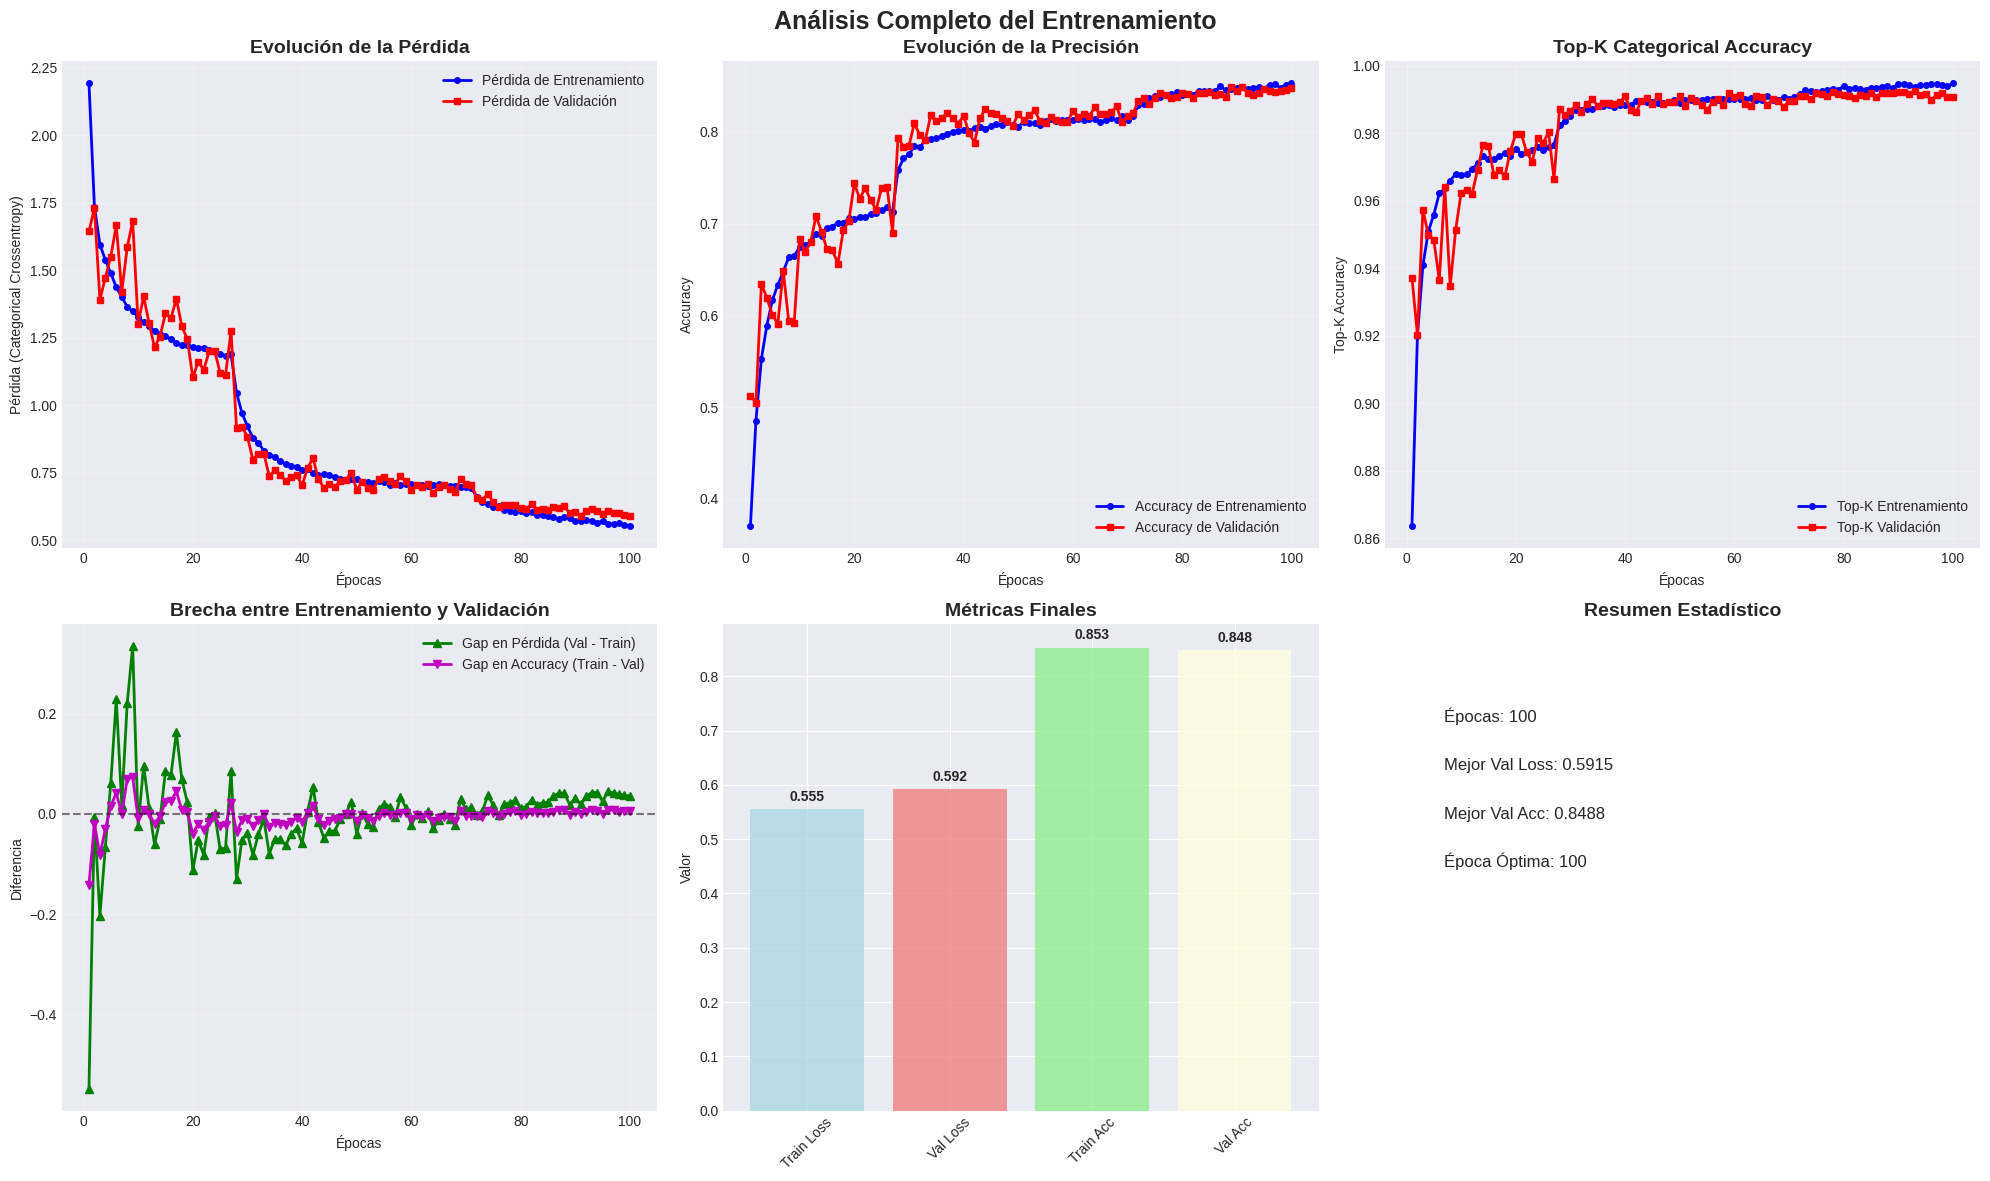


📊 RESUMEN DETALLADO DE MÉTRICAS
Métrica                   Inicial      Final        Mejor        Mejora      
--------------------------------------------------------------------------------
Train Loss                2.1925       0.5553       0.5553       -           
Validation Loss           1.6445       0.5915       0.5915       64.0       %
Train Accuracy            0.3708       0.8528       0.8528       -           
Validation Accuracy       0.5122       0.8478       0.8488       65.7       %

Época con mejor rendimiento: 100
Total de épocas entrenadas: 100
CPU times: user 1.24 s, sys: 16.9 ms, total: 1.26 s
Wall time: 1.3 s


In [13]:
%%time
# Extraer métricas del historial de entrenamiento
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_top_k = history.history['top_k_categorical_accuracy']
val_top_k = history.history['val_top_k_categorical_accuracy']

# Crear rango de épocas para el eje X
epochs_range = range(1, len(train_loss) + 1)

# Crear figura con subplots para visualización completa
fig = plt.figure(figsize=(20, 12))

# =================== GRÁFICO 1: PÉRDIDA ===================
plt.subplot(2, 3, 1)
plt.plot(epochs_range, train_loss, 'b-o', label='Pérdida de Entrenamiento', linewidth=2, markersize=4)
plt.plot(epochs_range, val_loss, 'r-s', label='Pérdida de Validación', linewidth=2, markersize=4)
plt.title('Evolución de la Pérdida', fontsize=14, fontweight='bold')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Categorical Crossentropy)')
plt.legend()
plt.grid(True, alpha=0.3)

# =================== GRÁFICO 2: ACCURACY ===================
plt.subplot(2, 3, 2)
plt.plot(epochs_range, train_acc, 'b-o', label='Accuracy de Entrenamiento', linewidth=2, markersize=4)
plt.plot(epochs_range, val_acc, 'r-s', label='Accuracy de Validación', linewidth=2, markersize=4)
plt.title('Evolución de la Precisión', fontsize=14, fontweight='bold')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# =================== GRÁFICO 3: TOP-K ACCURACY ===================
plt.subplot(2, 3, 3)
plt.plot(epochs_range, train_top_k, 'b-o', label='Top-K Entrenamiento', linewidth=2, markersize=4)
plt.plot(epochs_range, val_top_k, 'r-s', label='Top-K Validación', linewidth=2, markersize=4)
plt.title('Top-K Categorical Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Épocas')
plt.ylabel('Top-K Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# =================== GRÁFICO 4: COMPARACIÓN TRAIN VS VAL ===================
plt.subplot(2, 3, 4)
gap_loss = np.array(val_loss) - np.array(train_loss)
gap_acc = np.array(train_acc) - np.array(val_acc)
plt.plot(epochs_range, gap_loss, 'g-^', label='Gap en Pérdida (Val - Train)', linewidth=2)
plt.plot(epochs_range, gap_acc, 'm-v', label='Gap en Accuracy (Train - Val)', linewidth=2)
plt.title('Brecha entre Entrenamiento y Validación', fontsize=14, fontweight='bold')
plt.xlabel('Épocas')
plt.ylabel('Diferencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# =================== GRÁFICO 5: MÉTRICAS FINALES ===================
plt.subplot(2, 3, 5)
final_metrics = [train_loss[-1], val_loss[-1], train_acc[-1], val_acc[-1]]
metric_names = ['Train Loss', 'Val Loss', 'Train Acc', 'Val Acc']
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']
bars = plt.bar(metric_names, final_metrics, color=colors, alpha=0.8)
plt.title('Métricas Finales', fontsize=14, fontweight='bold')
plt.ylabel('Valor')
plt.xticks(rotation=45)
for bar, value in zip(bars, final_metrics):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# =================== GRÁFICO 6: LEARNING RATE (si está disponible) ===================
plt.subplot(2, 3, 6)
if 'lr' in history.history:
    lr_values = history.history['lr']
    plt.plot(epochs_range, lr_values, 'purple', linewidth=3, marker='o')
    plt.title('Evolución del Learning Rate', fontsize=14, fontweight='bold')
    plt.xlabel('Épocas')
    plt.ylabel('Learning Rate')
    plt.yscale('log')  # Escala logarítmica para mejor visualización
    plt.grid(True, alpha=0.3)
else:
    # Si no hay información de LR, mostrar resumen estadístico
    stats = {
        'Épocas Entrenadas': len(train_loss),
        'Mejor Val Loss': min(val_loss),
        'Mejor Val Acc': max(val_acc),
        'Época con Mejor Val Loss': np.argmin(val_loss) + 1
    }
    plt.text(0.1, 0.8, f'Épocas: {len(train_loss)}', fontsize=12, transform=plt.gca().transAxes)
    plt.text(0.1, 0.7, f'Mejor Val Loss: {min(val_loss):.4f}', fontsize=12, transform=plt.gca().transAxes)
    plt.text(0.1, 0.6, f'Mejor Val Acc: {max(val_acc):.4f}', fontsize=12, transform=plt.gca().transAxes)
    plt.text(0.1, 0.5, f'Época Óptima: {np.argmin(val_loss) + 1}', fontsize=12, transform=plt.gca().transAxes)
    plt.title('Resumen Estadístico', fontsize=14, fontweight='bold')
    plt.axis('off')

plt.suptitle('Análisis Completo del Entrenamiento', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# =================== TABLA DE MÉTRICAS DETALLADA ===================
print("\n" + "="*80)
print("📊 RESUMEN DETALLADO DE MÉTRICAS")
print("="*80)

# Calcular métricas estadísticas
best_val_epoch = np.argmin(val_loss) + 1
final_train_loss = train_loss[-1]
final_val_loss = val_loss[-1]
final_train_acc = train_acc[-1]
final_val_acc = val_acc[-1]
best_val_loss = min(val_loss)
best_val_acc = max(val_acc)

# Calcular mejora total
initial_train_loss = train_loss[0]
initial_val_loss = val_loss[0]
initial_train_acc = train_acc[0]
initial_val_acc = val_acc[0]

loss_improvement = ((initial_val_loss - best_val_loss) / initial_val_loss) * 100
acc_improvement = ((best_val_acc - initial_val_acc) / initial_val_acc) * 100

print(f"{'Métrica':<25} {'Inicial':<12} {'Final':<12} {'Mejor':<12} {'Mejora':<12}")
print("-" * 80)
print(f"{'Train Loss':<25} {initial_train_loss:<12.4f} {final_train_loss:<12.4f} {min(train_loss):<12.4f} {'-':<12}")
print(f"{'Validation Loss':<25} {initial_val_loss:<12.4f} {final_val_loss:<12.4f} {best_val_loss:<12.4f} {loss_improvement:<11.1f}%")
print(f"{'Train Accuracy':<25} {initial_train_acc:<12.4f} {final_train_acc:<12.4f} {max(train_acc):<12.4f} {'-':<12}")
print(f"{'Validation Accuracy':<25} {initial_val_acc:<12.4f} {final_val_acc:<12.4f} {best_val_acc:<12.4f} {acc_improvement:<11.1f}%")
print(f"\nÉpoca con mejor rendimiento: {best_val_epoch}")
print(f"Total de épocas entrenadas: {len(train_loss)}")


## **Evaluación Final del Modelo en el Conjunto de Prueba**

Este es el momento de la verdad. La evaluación final se realiza sobre el **conjunto de prueba**, datos que el modelo nunca ha visto, ni siquiera durante la validación. Esto nos da la medida más honesta de su capacidad de generalización a nuevos datos.

**1. Carga del Mejor Modelo:**

  * Primero, cargamos el modelo `best_model.h5` que fue guardado por nuestro callback `ModelCheckpoint`. Esto asegura que estamos evaluando la mejor versión del modelo, aquella que logró la menor pérdida en el conjunto de validación.

**2. Evaluación Cuantitativa:**

  * Utilizamos `model.evaluate()` para obtener las métricas finales de rendimiento (pérdida, accuracy, top-k accuracy) en el conjunto de prueba. El resultado, una **precisión del 84.49%**, confirma que el modelo es robusto y generaliza muy bien.

**3. Matriz de Confusión:**

  * Generamos y visualizamos una matriz de confusión. Esta herramienta es invaluable para un análisis cualitativo. La diagonal principal muestra las predicciones correctas para cada clase. Los valores fuera de la diagonal revelan los errores específicos de clasificación. Por ejemplo, podemos ver qué clases tiende a confundir el modelo (como 'Gato' con 'Perro' o 'Ciervo').

**4. Reporte de Clasificación:**

  * Finalmente, imprimimos un reporte de clasificación detallado. Este reporte desglosa el rendimiento por cada clase, utilizando métricas como:
      * **Precisión (Precision):** De todas las veces que el modelo predijo una clase, ¿qué porcentaje fue correcto?
      * **Recall (Exhaustividad):** De todas las instancias reales de una clase, ¿qué porcentaje identificó correctamente el modelo?
      * **F1-Score:** La media armónica de precisión y recall, proporcionando una única métrica balanceada por clase.

Este análisis nos permite identificar las fortalezas y debilidades del modelo a un nivel granular. Por ejemplo, vemos que tiene un rendimiento excelente para clases como 'Automóvil' y 'Barco', pero tiene más dificultades con 'Gato' y 'Pájaro', que son visualmente más variables.

✅ Modelo óptimo cargado desde checkpoint

🎯 EVALUACIÓN FINAL EN CONJUNTO DE PRUEBA
Pérdida en prueba: 0.6033
Accuracy en prueba: 0.8449 (84.49%)
Top-K Accuracy en prueba: 0.9920 (99.20%)


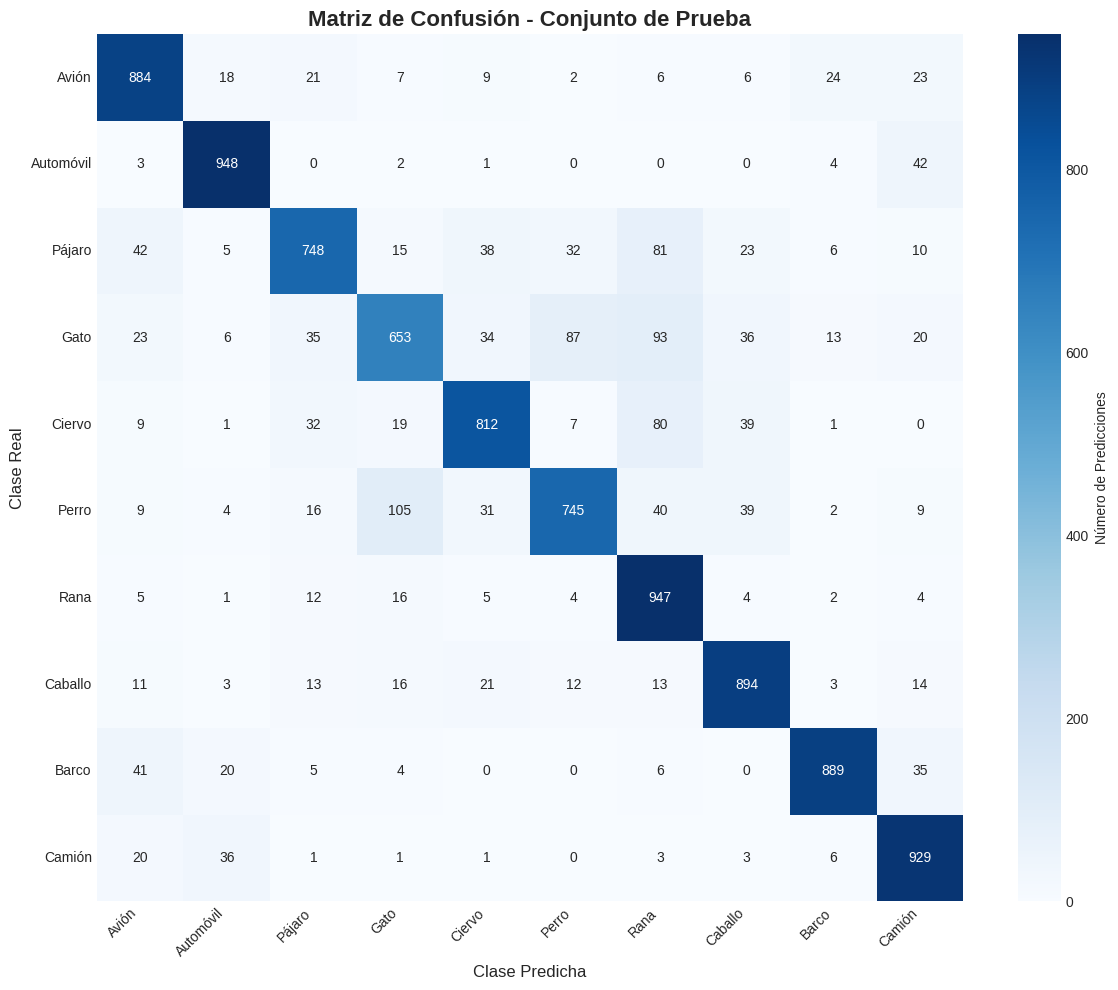


📋 REPORTE DE CLASIFICACIÓN POR CLASE
              precision    recall  f1-score   support

       Avión     0.8443    0.8840    0.8637      1000
   Automóvil     0.9098    0.9480    0.9285      1000
      Pájaro     0.8471    0.7480    0.7945      1000
        Gato     0.7792    0.6530    0.7106      1000
      Ciervo     0.8529    0.8120    0.8320      1000
       Perro     0.8380    0.7450    0.7888      1000
        Rana     0.7463    0.9470    0.8347      1000
     Caballo     0.8563    0.8940    0.8748      1000
       Barco     0.9358    0.8890    0.9118      1000
      Camión     0.8554    0.9290    0.8907      1000

    accuracy                         0.8449     10000
   macro avg     0.8465    0.8449    0.8430     10000
weighted avg     0.8465    0.8449    0.8430     10000

CPU times: user 30 s, sys: 813 ms, total: 30.8 s
Wall time: 20.5 s


In [14]:
%%time
# Cargar el mejor modelo guardado (si existe)
try:
    best_model = tf.keras.models.load_model('best_model.h5')
    print("✅ Modelo óptimo cargado desde checkpoint")
except:
    best_model = model
    print("⚠️  Usando modelo actual (checkpoint no disponible)")

# Evaluar el modelo final en el conjunto de prueba
print("\n" + "="*60)
print("🎯 EVALUACIÓN FINAL EN CONJUNTO DE PRUEBA")
print("="*60)

test_loss, test_accuracy, test_top_k = best_model.evaluate(x_test, y_test, verbose=0)

print(f"Pérdida en prueba: {test_loss:.4f}")
print(f"Accuracy en prueba: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Top-K Accuracy en prueba: {test_top_k:.4f} ({test_top_k*100:.2f}%)")

# Realizar predicciones detalladas
y_pred = best_model.predict(x_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calcular matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Visualizar matriz de confusión
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Número de Predicciones'})
plt.title('Matriz de Confusión - Conjunto de Prueba', fontsize=16, fontweight='bold')
plt.xlabel('Clase Predicha', fontsize=12)
plt.ylabel('Clase Real', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Mostrar reporte de clasificación detallado
print("\n" + "="*60)
print("📋 REPORTE DE CLASIFICACIÓN POR CLASE")
print("="*60)
report = classification_report(y_test_classes, y_pred_classes,
                             target_names=class_names,
                             digits=4)
print(report)

## **Análisis Cualitativo de Predicciones Específicas**

Más allá de las métricas agregadas, examinar predicciones individuales nos da una visión intuitiva de cómo "piensa" el modelo. En esta celda, clasificamos y visualizamos ejemplos específicos para entender mejor sus fortalezas y debilidades.

Hemos dividido los ejemplos en tres categorías:

1.  **Alta Confianza Correcta:**

      * Estos son los casos en los que el modelo no solo acierta, sino que lo hace con una alta probabilidad (confianza). Son ejemplos "fáciles" o canónicos de cada clase que el modelo ha aprendido a reconocer sin dudar.

2.  **Alta Confianza Incorrecta:**

      * Estos son los errores más interesantes y problemáticos. El modelo está muy seguro de su predicción, pero está equivocado. Analizar estas imágenes nos ayuda a entender los sesgos o las "pistas falsas" que el modelo puede estar siguiendo. Por ejemplo, puede confundir un ciervo con un perro por su forma de cuatro patas, o un camión con un automóvil si el ángulo es inusual.

3.  **Baja Confianza Correcta:**

      * En estos casos, el modelo acierta, pero con poca confianza. Estas suelen ser las imágenes más difíciles del dataset: objetos en ángulos extraños, con mala iluminación, parcialmente ocultos o que se parecen a otras clases. El hecho de que el modelo acierte, aunque con dudas, demuestra su capacidad para manejar la ambigüedad.

Esta visualización cualitativa complementa perfectamente el análisis cuantitativo de la matriz de confusión y el reporte de clasificación, dándonos una comprensión completa y profunda del rendimiento del modelo.


🔍 ANÁLISIS DE CASOS ESPECIALES
Predicciones correctas con alta confianza (>90%): 6416
Predicciones incorrectas con alta confianza (>70%): 621
Predicciones correctas con baja confianza (<60%): 610


<timed exec>:60: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Liberation Sans.
<timed exec>:60: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Liberation Sans.
<timed exec>:60: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) Liberation Sans.
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


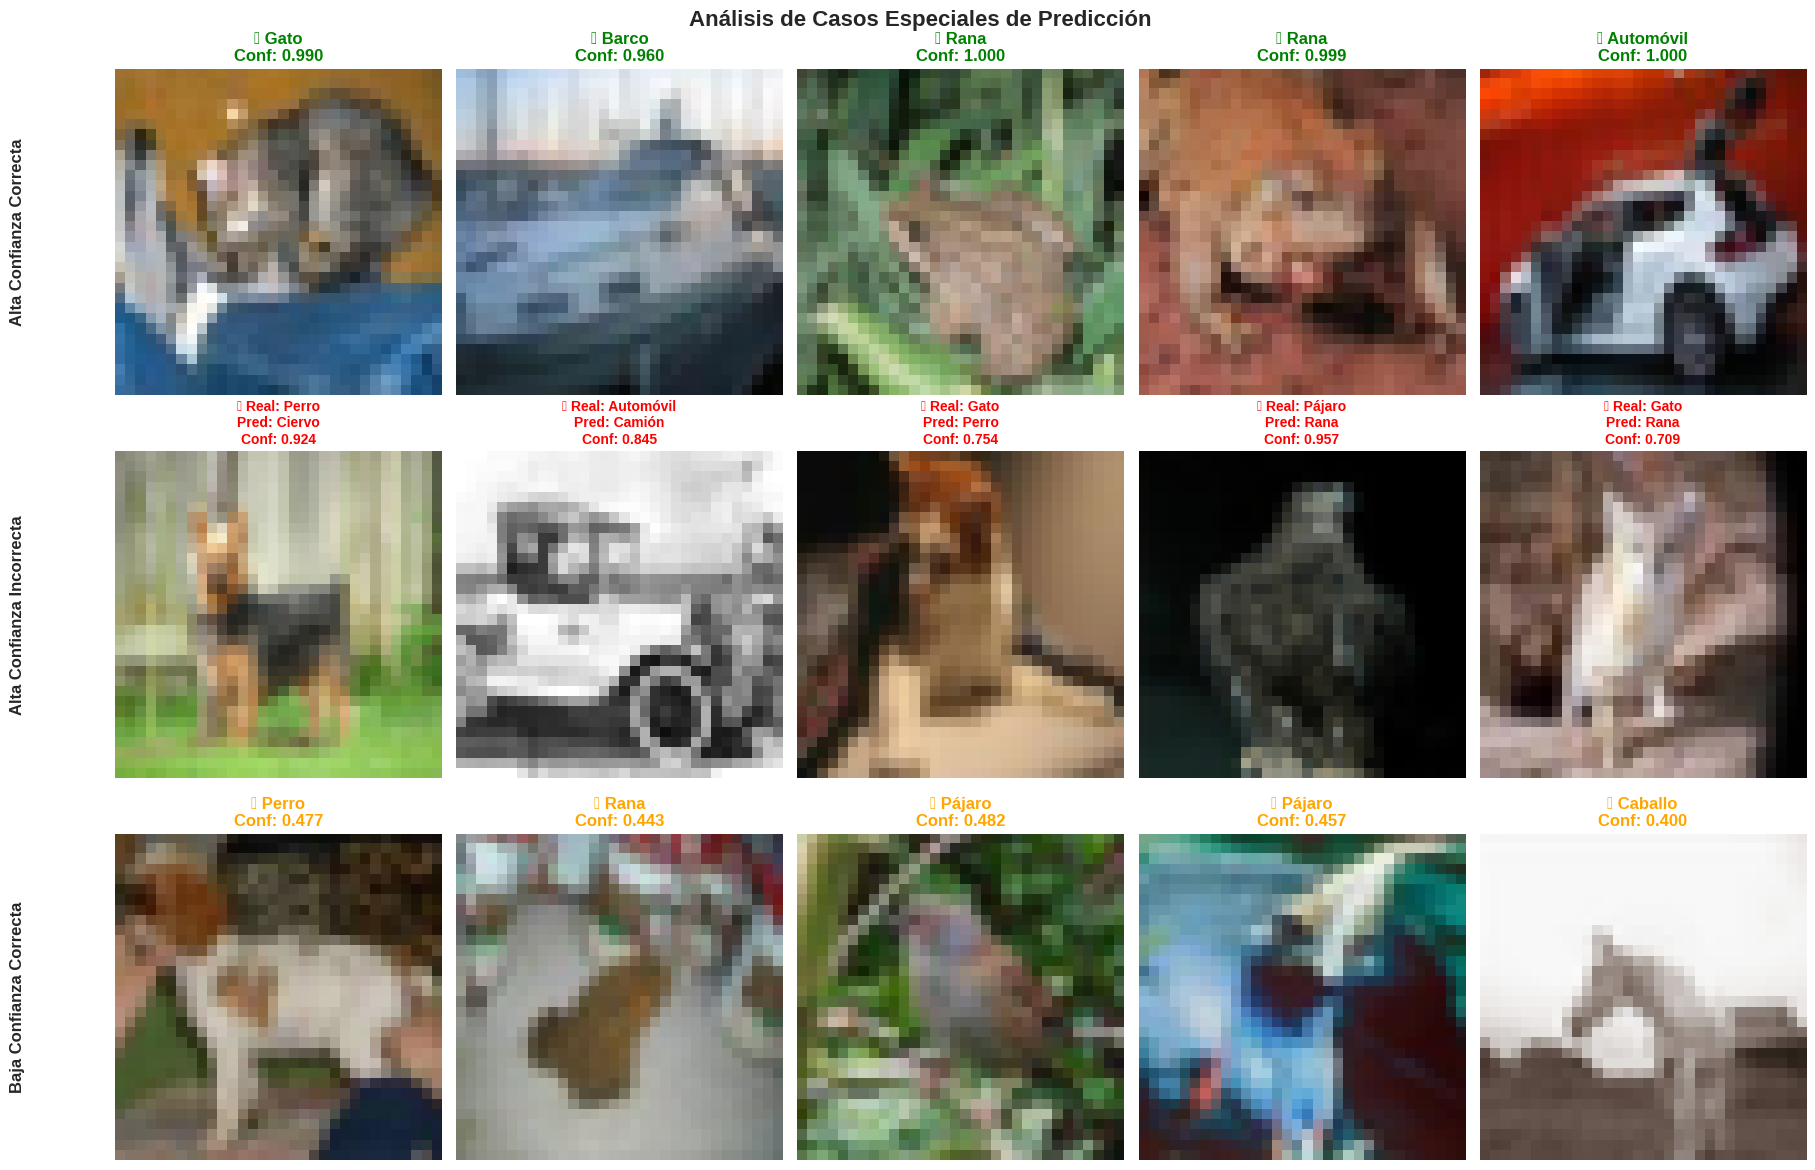

CPU times: user 1.06 s, sys: 17 ms, total: 1.07 s
Wall time: 1.08 s


In [15]:
%%time
# Identificar las mejores y peores predicciones
prediction_confidence = np.max(y_pred, axis=1)
prediction_correctness = (y_pred_classes == y_test_classes)

# Encontrar casos de alta confianza correctos e incorrectos
correct_high_conf = np.where((prediction_correctness) & (prediction_confidence > 0.9))[0]
incorrect_high_conf = np.where((~prediction_correctness) & (prediction_confidence > 0.7))[0]
correct_low_conf = np.where((prediction_correctness) & (prediction_confidence < 0.6))[0]

print("🔍 ANÁLISIS DE CASOS ESPECIALES")
print("="*60)
print(f"Predicciones correctas con alta confianza (>90%): {len(correct_high_conf)}")
print(f"Predicciones incorrectas con alta confianza (>70%): {len(incorrect_high_conf)}")
print(f"Predicciones correctas con baja confianza (<60%): {len(correct_low_conf)}")

# Visualizar casos representativos
fig, axes = plt.subplots(3, 5, figsize=(18, 12))
fig.suptitle('Análisis de Casos Especiales de Predicción', fontsize=16, fontweight='bold')

# Casos correctos con alta confianza
for i in range(5):
    if i < len(correct_high_conf):
        idx = correct_high_conf[i]
        axes[0, i].imshow(x_test[idx])
        confidence = prediction_confidence[idx]
        true_class = class_names[y_test_classes[idx]]
        axes[0, i].set_title(f'✅ {true_class}\nConf: {confidence:.3f}',
                           color='green', fontweight='bold')
    axes[0, i].axis('off')

# Casos incorrectos con alta confianza (errores del modelo)
for i in range(5):
    if i < len(incorrect_high_conf):
        idx = incorrect_high_conf[i]
        axes[1, i].imshow(x_test[idx])
        confidence = prediction_confidence[idx]
        true_class = class_names[y_test_classes[idx]]
        pred_class = class_names[y_pred_classes[idx]]
        axes[1, i].set_title(f'❌ Real: {true_class}\nPred: {pred_class}\nConf: {confidence:.3f}',
                           color='red', fontsize=10, fontweight='bold')
    axes[1, i].axis('off')

# Casos correctos con baja confianza (casos difíciles)
for i in range(5):
    if i < len(correct_low_conf):
        idx = correct_low_conf[i]
        axes[2, i].imshow(x_test[idx])
        confidence = prediction_confidence[idx]
        true_class = class_names[y_test_classes[idx]]
        axes[2, i].set_title(f'🤔 {true_class}\nConf: {confidence:.3f}',
                           color='orange', fontweight='bold')
    axes[2, i].axis('off')

# Etiquetas para las filas
row_labels = ['Alta Confianza Correcta', 'Alta Confianza Incorrecta', 'Baja Confianza Correcta']
for i, label in enumerate(row_labels):
    axes[i, 0].annotate(label, xy=(-0.3, 0.5), xycoords='axes fraction',
                       rotation=90, va='center', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## **Análisis Final y Conclusiones**

A partir del desarrollo y los resultados obtenidos, podemos responder a las preguntas clave del ejercicio.

-----

#### **¿Qué técnica tuvo mayor impacto?**

Si bien el rendimiento del modelo es el resultado de la **sinergia** de todas las técnicas, se puede argumentar que el **Data Augmentation** tuvo el mayor impacto individual en la capacidad de generalización. Al crear un flujo virtualmente infinito de datos de entrenamiento variados, obligó al modelo a aprender características robustas e invariantes, en lugar de memorizar ejemplos específicos. Esto se refleja directamente en la pequeña y estable "brecha de generalización" que vimos en los gráficos de entrenamiento.

Inmediatamente después, la combinación de **Batch Normalization** y **Dropout** fue crucial. `Batch Normalization` estabilizó y aceleró el entrenamiento de una red más profunda, mientras que `Dropout` actuó como un potente regularizador que previno la co-dependencia neuronal, forzando un aprendizaje más distribuido.

Finalmente, los callbacks como **`ModelCheckpoint`** y **`ReduceLROnPlateau`** fueron esenciales para la optimización, asegurando que guardáramos el mejor modelo y que el aprendizaje se refinara en las etapas finales.

-----

#### **¿Cómo se evitó el sobreajuste?**

Se implementó una estrategia de defensa de múltiples capas para combatir el sobreajuste, que es el principal desafío en modelos de alta capacidad como las CNN:

1.  **Aumento de Datos (Data Augmentation):** Fue nuestra primera y más fuerte línea de defensa, aumentando la diversidad del conjunto de entrenamiento sin necesidad de recolectar nuevas imágenes.
2.  **Regularización L2:** Aplicada a las capas `Conv2D` y `Dense`, penalizó los pesos grandes, promoviendo modelos más simples y menos propensos a ajustarse al ruido de los datos de entrenamiento.
3.  **Dropout:** Al "apagar" aleatoriamente el 50% de las neuronas en la capa densa, se evitó que el modelo dependiera excesivamente de unas pocas neuronas, forzándolo a aprender características más redundantes y robustas.
4.  **Batch Normalization:** Aunque su objetivo principal es la estabilización, tiene un efecto regularizador secundario al añadir un ligero ruido a las activaciones de cada lote.
5.  **Creación de un Conjunto de Validación:** Nos permitió monitorear el rendimiento en datos no vistos durante el entrenamiento, sirviendo como el "canario en la mina" para detectar el inicio del sobreajuste.
6.  **Callbacks (`EarlyStopping` y `ModelCheckpoint`):** Actuaron como la red de seguridad final. Monitorearon la métrica de validación (`val_loss`) y nos aseguraron de detener el entrenamiento y guardar el modelo en su punto óptimo de generalización, antes de que el sobreajuste se volviera perjudicial.

-----

#### **¿Qué harías diferente si el dataset fuese más grande?**

Un dataset significativamente más grande (por ejemplo, con millones de imágenes como ImageNet) cambiaría la estrategia de varias maneras fundamentales:

1.  **Transfer Learning (Aprendizaje por Transferencia):** Esta sería la estrategia más importante y efectiva. En lugar de entrenar una red desde cero, utilizaría una arquitectura de vanguardia (como ResNet, EfficientNet, o Vision Transformer) que ya haya sido **pre-entrenada** en un dataset masivo como ImageNet. Luego, congelaría las capas iniciales (que ya son excelentes extractores de características generales) y re-entrenaría solo las últimas capas (el clasificador) con el nuevo dataset. Esto ahorra una cantidad inmensa de tiempo y recursos computacionales y casi siempre produce resultados superiores.
2.  **Arquitectura del Modelo:** Con más datos para aprender, se podría justificar el uso de arquitecturas mucho más profundas y complejas sin el mismo riesgo de sobreajuste. El modelo actual sería probablemente demasiado simple.
3.  **Data Augmentation:** Seguiría siendo extremadamente importante. De hecho, con modelos más grandes, se podrían aplicar políticas de augmentation aún más agresivas (por ejemplo, técnicas como *Cutout*, *Mixup*, o *AutoAugment*).
4.  **Infraestructura y Estrategia de Entrenamiento:** El entrenamiento requeriría hardware más potente (múltiples GPUs o TPUs). Se volverían necesarias estrategias de entrenamiento distribuido (por ejemplo, usando `tf.distribute.Strategy`) para paralelizar el cálculo y reducir el tiempo de entrenamiento de días o semanas a horas.
5.  **Optimización:** Se podrían explorar planificadores de tasa de aprendizaje (learning rate schedulers) más avanzados, como el *Cosine Annealing* o el *One-Cycle Policy*, que han demostrado ser muy eficaces para entrenar modelos grandes de manera rápida y eficiente.